In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy import units as un
from scipy import constants as cs
from scipy import optimize as opt
from scipy import integrate as intg
import galpy.potential as pot
from galpy.orbit import Orbit
from galpy.util import bovy_coords
from galpy.actionAngle import actionAngleIsochrone
import matplotlib.colors as cmaps
import math

%matplotlib inline

In [1]:
import sys
sys.path.insert(0, '/home/sophia/Dokumente/Sophia_Uni/Bachelor/bachelor_thesis_ipython_notebooks')

from GC_Orbit_class import GCorbit

In [3]:
# Daten einlesen
if 0:
    r_3d,m1,m2,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH1.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
else:
    r_3d,m1,m2,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)

In [5]:
bh_orbit=GCorbit(inputfilename='densityfile_IMBH1.txt',bhmass_M_sun=m1[0]+m2[0])
r3d_1,J_phi_1,J_theta_1,J_r_1=np.loadtxt('../../../../Bachelorarbeit-2/actions_IMBH1.txt')

In [6]:
### find J_r = 0, J_theta = 0, J_phi != 0 ###
Orbit_1 = (J_r_1<0.01)*(J_theta_1<0.01)
test_1=np.flatnonzero(Orbit_1)
print(test_1)

### find J_r = 0, J_theta != 0 and J_phi != 0 ###
Orbit_2=(J_r_1==0.)
test_2=np.flatnonzero(Orbit_2)
print(test_2)


/home/sophia/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in less
  from IPython.kernel.zmq import kernelapp as app

[19420]
[257379 430590 517105 574832]


In [7]:
###v circ r m

bh_orbit.v_circ(4.13329)

4.109292019600669e-13

In [8]:
### calculate T_circ ###
v_circ=bh_orbit.v_circ(r_3d[1:]) #[pc/s]
T_circ=(2*np.pi*r_3d[1:])/v_circ #[s]
T_circ_yr=un.s.to(un.yr,T_circ) #[yr]

step=1e-12



In [9]:
print(v_circ,T_circ_yr,len(v_circ),len(T_circ))

[  3.76571433e-12   3.68244556e-12   3.23198677e-12 ...,   3.87444494e-13
   3.88865690e-13   3.94290633e-13] [  1.69957608e+02   1.81727105e+02   2.68527774e+02 ...,   5.34446113e+07
   5.33173831e+07   5.28393142e+07] 1026734 1026734


In [12]:
n=19421
xn,yn,zn,vxn_kms,vyn_kms,vzn_kms,tn_yr=bh_orbit.orbit_integration(x[n],y[n],z[n],vx[n],vy[n],vz[n],dt=step*8*T_circ_yr[n-1],t_end=8*T_circ_yr[n-1])
np.savetxt('orbit_J_phi_n='+str(n),(xn,yn,zn,vxn_kms,vyn_kms,vzn_kms,tn_yr))

MemoryError: 

In [ ]:
m=193779
xm,ym,zm,vxm_kms,vym_kms,vzm_kms,tm_yr=bh_orbit.orbit_integration(x[m],y[m],z[m],vx[m],vy[m],vz[m],dt=step*8*T_circ_yr[m-1],t_end=8*T_circ_yr[m-1])
np.savetxt('orbit_J_phi_J_theta_m='+str(m),(xm,ym,zm,vxm_kms,vym_kms,vzm_kms,tm_yr))

In [ ]:
k=486385
xk,yk,zk,vxk_kms,vyk_kms,vzk_kms,tk_yr=bh_orbit.orbit_integration(x[k],y[k],z[k],vx[k],vy[k],vz[k],dt=step*8*T_circ_yr[k-1],t_end=8*T_circ_yr[k-1])
np.savetxt('orbit_random_k='+str(k),(xk,yk,zk,vxk_kms,vyk_kms,vzk_kms,tk_yr))

In [10]:
plt.plot(xl,zl)

NameError: name 'xl' is not defined

In [12]:
mges=un.solMass.to(un.kg,np.sum(m1+m2))

ni=17916

xi=x[ni]
yi=y[ni]
zi=z[ni]

vxi=vx[ni]
vyi=vy[ni]
vzi=vz[ni]

xim=un.pc.to(un.m, xi)
yim=un.pc.to(un.m, yi)
zim=un.pc.to(un.m, zi)

x0=xim
y0=yim
z0=zim

kms=un.km/un.s
ms=un.m/un.s

r=np.sqrt(x**2+y**2+z**2)
ri=r[ni]
rim=un.pc.to(un.m,ri)

vxim=kms.to(ms,vxi)
vyim=kms.to(ms,vyi)
vzim=kms.to(ms,vzi)

vx0=vxim
vy0=vyim
vz0=vzim


N=5000000
start=1e7
end=1e14
t=np.linspace(start,end,N)
dt=t[1]-t[0]

#vri=vr[ni]
#vrim=kms.to(ms,vri)

In [13]:
# some potential
b=1.
phi=-cs.G*mges/(b+np.sqrt(b**2+rim**2)).
phi_dyn=-cs.G/(b+np.sqrt(b**2+rim**2))

def force_isochrone(x,y,z):

    r=np.sqrt(x**2+y**2+z**2)
#    phi=-cs.G*mges/(b+np.sqrt(b**2+r**2))
    a=np.zeros(3)
    a[0]=-cs.G*mges*x/(np.sqrt(b**2+r**2)*(np.sqrt(b**2+r**2)+b)**2)
    a[1]=-cs.G*mges*y/(np.sqrt(b**2+r**2)*(np.sqrt(b**2+r**2)+b)**2)
    a[2]=-cs.G*mges*z/(np.sqrt(b**2+r**2)*(np.sqrt(b**2+r**2)+b)**2)
    return a


leapfrog:

$x_{i+1}=x_i+v_i\Delta t+\frac{a_i(x_i)}{2}\Delta t^2$

$v_{i+1}=v_i+\frac{a(x_{i+1})+a(x_i)}{2}\Delta t$

In [14]:
#leapfrog
xl=np.zeros(N+1)
yl=np.zeros(N+1)
zl=np.zeros(N+1)

x_l=np.sqrt(xl**2+yl**2+zl**2)

vxl=np.zeros(N+1)
vyl=np.zeros(N+1)
vzl=np.zeros(N+1)

xl[0]=x0
yl[0]=y0
zl[0]=z0

vxl[0]=vx0
vyl[0]=vy0
vzl[0]=vz0

for i in range(N):
    xl[0]=x0
    yl[0]=y0
    zl[0]=z0
    
    a=force_isochrone(xl[i],yl[i],zl[i])
    
    xl[i+1]=xl[i]+vxl[i]*dt+1./2.*a[0]*dt**2
    yl[i+1]=yl[i]+vyl[i]*dt+1./2.*a[1]*dt**2
    zl[i+1]=zl[i]+vzl[i]*dt+1./2.*a[2]*dt**2
    
    a_1=force_isochrone(xl[i+1],yl[i+1],zl[i+1])
    
    vxl[i+1]=vxl[i]+1./2.*(a[0]+a_1[0])*dt
    vyl[i+1]=vyl[i]+1./2.*(a[1]+a_1[1])*dt
    vzl[i+1]=vzl[i]+1./2.*(a[2]+a_1[2])*dt


KeyboardInterrupt: 

In [48]:
#galpy crosscheck
isopot=pot.IsochronePotential(amp=cs.G*mges,b=b,normalize=False)

#in Galactocentric cylindrical coordinates vxvv=[R,vR,vT(,z,vz,phi)]
R,phi,z_new=bovy_coords.rect_to_cyl(xim,yim,zim) #ort
vR,vT,vz_new=bovy_coords.rect_to_cyl_vec(vxim,vyim,vzim,xim,yim,zim) #geschw
o=Orbit(vxvv=[R,vR,vT,z_new,vz_new,phi])
o.integrate(t,isopot)


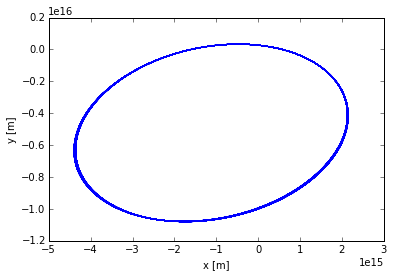

In [49]:
xlpc=un.m.to(un.pc,xl)
ylpc=un.m.to(un.pc,yl)
zlpc=un.m.to(un.pc,zl)
plt.plot(xl,yl)
plt.xlabel('x [m]')
plt.ylabel('y [m]')


In [50]:
o.plot(d1='x',d2='y')

KeyboardInterrupt: 

In [ ]:
plt.plot(xl,zl)
plt.xlabel('x [m]')
plt.ylabel('z [m]')
o.plot(d1='x',d2='z')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xlpc,ylpc,zlpc)
ax.set_xlabel('x [pc]')
ax.set_ylabel('y [pc]')
ax.set_zlabel('z [pc]')

In [ ]:
rlpc=np.sqrt(xlpc**2+ylpc**2+zlpc**2)
print(np.min(rlpc))
print(ri)
print(np.max(rlpc))

actions
---

In [30]:
#angular moments without mass

def angularmom(xl,yl,zl,vxl,vyl,vzl):
    Lx=yl*vzl-zl*vyl
    Ly=zl*vxl-xl*vzl
    Lz=xl*vyl-yl*vxl
    L=np.sqrt(Lx**2+Ly**2+Lz**2)
    return L,Lx,Ly,Lz

def potential(xl,yl,zl,M=mges,b=2):
    pot=-cs.G*M/(b+np.sqrt(b**2+(np.sqrt(xl**2+yl**2+zl**2))**2))
    return pot 

def energy(xl,yl,zl,vxl,vyl,vzl):
    pot=potential(xl,yl,zl,M=mges,b=b)
    E=vxl**2./2.+vyl**2./2.+vzl**2./2.+pot
    return E

def periapocenter(rl):
#    r=np.sqrt(xl**2+yl**2+zl**2)
    pot=potential(xl,yl,zl,M=mges,b=b)
    
    return (1/rl)**2.+2.*(pot-E[0])/L[0]**2.

rl=np.sqrt(xl**2+yl**2+zl**2)

rmin=opt.fsolve(periapocenter,np.min(rl)) #nicht min(rl) sondern einfach kleiner wert weil ich es erst durch orbit integration weiss
rmax=opt.fsolve(periapocenter,np.max(rl))

def j_rint(xl,yl,zl,vxl,vyl,vzl,E,L,pot):
    r=np.sqrt(xl**2+yl**2+zl**2)
    pot=potential(xl,yl,tl,M=M,b=b)
    E=energy(vxl,vyl,vzl,pot)
    L=angularmom(xl,yl,zl,vxl,vyl,vzl)
    return np.sqrt(2.*E-2.*pot-L**2./r**2.)

def J_phi(xl,yl,vxl,vyl):
    Lz=xl*vyl-yl*vxl
    J_phi=Lz
    return J_phi
    
def J_theta(L,Lz):
    L=angularmom(xl,yl,zl,vxl,vyl,vzl)[0]
    Lz=angularmom(xl,yl,zl,vxl,vyl,vzl)[1]
    J_theta=L-np.abs(Lz)
    return J_theta
#j_rint=lambda r_var: np.sqrt(2.*E-2.*Phi(r_var)-L**2./r_var**2.)

def J_r():
#    J_r=np.zeros(len(J_phi))
#for i in range(len(J_r)):
    J_r=1/np.pi*intg.quad(j_rint,rmin,rmax)[0] #rmin,rmax,args=(E,L)
#J_ri=cs.G*mges/np.sqrt(-2.*E)-1./2.*(L+np.sqrt(L**2.-4.*cs.G*mges*b))
    return J_r
#print(rmin,rmax)


NameError: name 'E' is not defined

In [ ]:
angularmom(xl[0],yl[0],zl[0],vxl[0],vyl[0],vzl[0])

In [ ]:
energy(xl[0],yl[0],zl[0],vxl[0],vyl[0],vzl[0])

In [ ]:
aAI= actionAngleIsochrone(ip=isopot)

In [ ]:
#galpy
tJ=np.linspace(start,end,N+1)
tg=np.linspace(start,end,N/100)
jfa= aAI.actionsFreqs(o.R(tg),o.vR(tg),o.vT(tg),o.z(tg),o.vz(tg),o.phi(tg))
Jr,Jphi,Jz=aAi(R,vR,vT,z,vz)

In [ ]:
plt.plot(tJ,J_phi,'b',tg,jfa[1],'r')

In [ ]:
plt.plot(tJ,J_theta,'b',tg,jfa[2],'r')

In [ ]:
plt.plot(tJ,J_r,'b',tg,jfa[0],'r')


In [ ]:
plt.plot(tJ,E)

In [ ]:
print len(E)



In [ ]:
print len(rl)

In [ ]:
np.sqrt(2.*E(r_var)-2.*Phi(r_var)-L(r_var)**2./r_var**2.)

In [ ]:
len(E)

In [ ]:
len(L)

In [ ]:
print rl
